In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
# Open the tiff image
#pil_img = Image.open("./LC08_L1TP_191035_20190407_20190422_01_T1/LC08_L1TP_191035_20190407_20190422_01_T1_B2.TIF")

def load_color_landsat_image(file_path):
    b2 = imageio.imread(file_path.format("B2"))
    b3 = imageio.imread(file_path.format("B3"))
    b4 = imageio.imread(file_path.format("B4"))
    image = np.stack([np.array(b4), np.array(b3), np.array(b2)], axis=-1) 
    return image

In [3]:
image = load_color_landsat_image("./LC08_L1TP_191034_20190407_20190422_01_T1/LC08_L1TP_191034_20190407_20190422_01_T1_{}.TIF")
#LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810

FileNotFoundError: No such file: '/Users/andrewmarmon/Documents/Projects/united-nations-resilient-cities/LC08_L1TP_191034_20190407_20190422_01_T1/LC08_L1TP_191034_20190407_20190422_01_T1_B2.TIF'

In [ ]:
image.shape

In [ ]:
fig, ax1 = plt.subplots(1, 1)

im = ax1.imshow(image[:, :, 2], cmap='gray', interpolation='nearest')

In [ ]:
from matplotlib.pyplot import figure

fig, ax1 = plt.subplots(1, 1, figsize=(15,15))
im = ax1.imshow(image / image.max(), interpolation='nearest')

In [ ]:
from matplotlib.pyplot import figure

fig, ax1 = plt.subplots(1, 1, figsize=(15,15))
im = ax1.imshow(image[4750:5000, 1750:2000, :] / image.max(), interpolation='nearest')

## These images are not very zoomed so looking into EarthExplorer API

In [1]:
import ee
import numpy as np

In [2]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/1AX4XfWhsySxfuo_1wIZo6xSYwcymWWX6gk88zPmGJ-JgruRUXw01DOxCa-g

Successfully saved authorization token.


In [3]:
geometry = ee.Geometry.Rectangle([9.8815, 37.0065, 10.4815,  36.6065])

In [4]:
import folium

image = ee.Image('LANDSAT/LC08/C01/T1_RT_TOA/LC08_191034_20190407')

collection = ee.ImageCollection('COPERNICUS/S2').filterDate('2018-01-01', '2019-01-30').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))#.filterBounds(ee.Geometry.Point(36.8065, 10.1815))

            
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
      tiles=map_id_dict['tile_fetcher'].url_format,
      attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
      name=name,
      overlay=True,
      control=True
  ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer

image_viz_params = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0,
    'max': 5000
}

map_l8 = folium.Map(location=[36.8065, 10.1815], zoom_start=13)

map_l8.add_ee_layer(collection.median(), image_viz_params, 'false color composite')
display(map_l8)

In [38]:
# Export the image, specifying scale and region.
task = ee.batch.Export.image.toDrive(collection.median(),'tunisia_scale_1', **{
    'maxPixels': 10000000000000,
    'scale': 1,
    'region': geometry.getInfo()['coordinates']
})
task.start()

import time 
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id

Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id

Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id

Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id: 7XYYPUOGNYMEQIBPJGQHPVFQ).
Polling for task (id

In [43]:
image_viz_params = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0,
    'max': .3
}
map_l8.add_ee_layer(image, image_viz_params, 'false color composite')
display(map_l8)

(5888, 5888, 3)


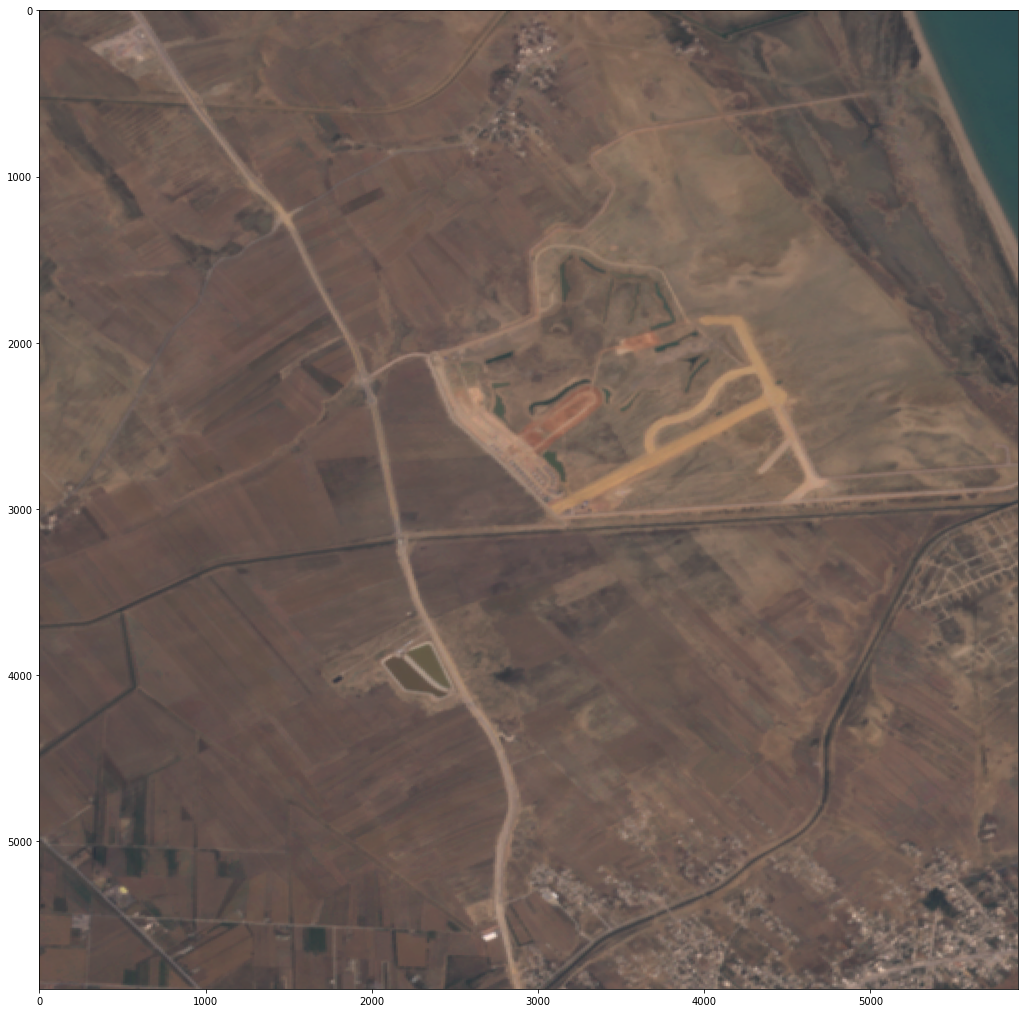

In [55]:
import rasterio
from rasterio.plot import show
fp = r'tunisia_scale_1000-0000000000-0000029440.tif'
img = rasterio.open(fp)
data = np.stack([img.read(4), img.read(3), img.read(2)], axis=-1)
print(data.shape)
norm = (data * (255 / np.max(data))).astype(np.uint8)
fig, ax = plt.subplots(figsize=(18, 18))
ax.imshow(norm)

In [32]:
img.indexes

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)

In [47]:
img.read(4).shape

(5888, 5888)